In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove_VI.glv import *

from sklearn.model_selection import KFold

In [2]:
# number of folds
n_splits = 20

# import file names
files = os.listdir("data/SET3_Thirdtrial/")

# fit gLV models

In [3]:
def predict_df(df, species):
    
    # save measured and predicted values
    exp_names = []
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # predict 
        Y_p, Y_std = model.predict(Y_m, t_span)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)
        
        ### prediction results for species that were present ###
        inds_present = Y_m[0] > 0 
        exp_names.append([exp]*sum(inds_present)*(Y_m.shape[0]-1))
        pred_species.append(np.tile(np.vstack(species)[inds_present], Y_m.shape[0]-1).T.ravel())
        true.append(Y_m[1:,inds_present].ravel())
        pred.append(Y_p[1:,inds_present].ravel())
        stdv.append(Y_std[1:,inds_present].ravel())
                
    # concatenate list
    exp_names = np.concatenate(exp_names)
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return exp_names, pred_species, true, pred, stdv

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Total samples: 258, Initial regularization: 1.00e-03
Loss: 30.477, Residuals: -0.308
Loss: 15.754, Residuals: 0.170
Loss: 13.026, Residuals: 0.087
Loss: 9.207, Residuals: 0.052
Loss: 7.339, Residuals: 0.038
Loss: 7.196, Residuals: 0.019
Loss: 6.937, Residuals: 0.017
Loss: 6.490, Residuals: 0.017
Loss: 6.353, Residuals: 0.039
Loss: 6.127, Residuals: 0.033
Loss: 5.853, Residuals: 0.026
Loss: 5.815, Residuals: 0.032
Loss: 5.745, Residuals: 0.029
Loss: 5.628, Residuals: 0.026
Loss: 5.598, Residuals: 0.034
Loss: 5.572, Residuals: 0.037
Loss: 5.522, Residuals: 0.034
Loss: 5.513, Residuals: 0.038
Loss: 5.436, Residuals: 0.033
Loss: 5.433, Residuals: 0.037
Loss: 5.322, Residuals: 0.028
Loss: 5.319, Residuals: 0.028
Loss: 5.315, Residuals: 0.029
Loss: 5.278, Residuals: 0.029
Loss: 5.214, Residuals: 0.023
Loss: 5.210, Residuals: 0.027
Loss: 5.204, Residuals: 0.027
Loss: 5.153, Residuals: 0.019
Loss: 5.151, Residuals: 0.022
Loss: 5.149, Residuals: 0.022
Loss: 5.131, Residuals: 0.019
Loss: 5.130, 

Loss: 6.011, Residuals: 0.020
Loss: 6.005, Residuals: 0.022
Loss: 5.962, Residuals: 0.015
Loss: 5.962, Residuals: 0.015
Loss: 5.961, Residuals: 0.015
Loss: 5.960, Residuals: 0.015
Loss: 5.948, Residuals: 0.012
Loss: 5.947, Residuals: 0.013
Loss: 5.941, Residuals: 0.012
Loss: 5.931, Residuals: 0.009
Loss: 5.931, Residuals: 0.010
Loss: 5.925, Residuals: 0.007
Loss: 5.924, Residuals: 0.007
Loss: 5.923, Residuals: 0.007
Loss: 5.918, Residuals: 0.004
Loss: 5.918, Residuals: 0.005
Loss: 5.917, Residuals: 0.005
Loss: 5.916, Residuals: 0.004
Loss: 5.916, Residuals: 0.004
Loss: 5.914, Residuals: 0.003
Loss: 5.914, Residuals: 0.004
Loss: 5.913, Residuals: 0.003
Loss: 5.913, Residuals: 0.003
Loss: 5.913, Residuals: 0.003
Loss: 5.912, Residuals: 0.002
Loss: 5.912, Residuals: 0.002
Loss: 5.911, Residuals: 0.002
Loss: 5.911, Residuals: 0.002
Loss: 5.911, Residuals: 0.002
Loss: 5.911, Residuals: 0.002
Loss: 5.910, Residuals: 0.001
Loss: 5.910, Residuals: 0.002
Loss: 5.910, Residuals: 0.002
Loss: 5.91

Loss: 1022.738, Residuals: 0.001
Loss: 1022.131, Residuals: 0.000
Loss: 1022.006, Residuals: 0.000
Optimization terminated successfully.
Evidence 4677.790
Updating hyper-parameters...
Total samples: 260, Updated regularization: 5.95e-01
Loss: 1031.798, Residuals: 0.001
Loss: 1030.025, Residuals: 0.001
Loss: 1029.233, Residuals: 0.000
Loss: 1028.179, Residuals: -0.001
Loss: 1028.015, Residuals: -0.001
Loss: 1026.596, Residuals: -0.001
Loss: 1026.550, Residuals: -0.001
Optimization terminated successfully.
Evidence 4690.635
Updating hyper-parameters...
Total samples: 260, Updated regularization: 7.05e-01
Loss: 1036.561, Residuals: -0.001
Loss: 1036.468, Residuals: -0.001
Optimization terminated successfully.
Evidence 4693.406
Pass count  1
Total samples: 257, Initial regularization: 1.00e-03
Loss: 30.740, Residuals: -0.292
Loss: 17.369, Residuals: 0.213
Loss: 13.886, Residuals: 0.104
Loss: 9.445, Residuals: 0.061
Loss: 7.964, Residuals: 0.021
Loss: 7.870, Residuals: 0.022
Loss: 7.691, Re

Loss: 8.317, Residuals: 0.033
Loss: 8.052, Residuals: 0.046
Loss: 7.607, Residuals: 0.036
Loss: 7.024, Residuals: 0.030
Loss: 6.958, Residuals: 0.037
Loss: 6.836, Residuals: 0.034
Loss: 6.785, Residuals: 0.045
Loss: 6.693, Residuals: 0.041
Loss: 6.541, Residuals: 0.033
Loss: 6.510, Residuals: 0.040
Loss: 6.454, Residuals: 0.036
Loss: 6.359, Residuals: 0.030
Loss: 6.353, Residuals: 0.035
Loss: 6.298, Residuals: 0.030
Loss: 6.275, Residuals: 0.032
Loss: 6.232, Residuals: 0.029
Loss: 6.227, Residuals: 0.032
Loss: 6.181, Residuals: 0.028
Loss: 6.123, Residuals: 0.024
Loss: 6.113, Residuals: 0.029
Loss: 6.034, Residuals: 0.021
Loss: 6.033, Residuals: 0.021
Loss: 6.031, Residuals: 0.021
Loss: 6.028, Residuals: 0.021
Loss: 6.000, Residuals: 0.018
Loss: 5.990, Residuals: 0.018
Loss: 5.988, Residuals: 0.018
Loss: 5.970, Residuals: 0.015
Loss: 5.969, Residuals: 0.017
Loss: 5.950, Residuals: 0.014
Loss: 5.949, Residuals: 0.015
Loss: 5.938, Residuals: 0.012
Loss: 5.930, Residuals: 0.010
Loss: 5.91

Loss: 5.884, Residuals: 0.002
Loss: 5.884, Residuals: 0.002
Loss: 5.884, Residuals: 0.002
Loss: 5.884, Residuals: 0.002
Loss: 5.884, Residuals: 0.002
Loss: 5.883, Residuals: 0.002
Loss: 5.883, Residuals: 0.002
Loss: 5.883, Residuals: 0.002
Loss: 5.883, Residuals: 0.002
Loss: 5.883, Residuals: 0.002
Loss: 5.883, Residuals: 0.002
Evidence -73.830
Updating hyper-parameters...
Total samples: 256, Updated regularization: 4.17e-01
Loss: 249.277, Residuals: 0.005
Optimization terminated successfully.
Evidence 3535.542
Updating hyper-parameters...
Total samples: 256, Updated regularization: 4.55e-01
Loss: 900.583, Residuals: 0.008
Optimization terminated successfully.
Evidence 4367.119
Updating hyper-parameters...
Total samples: 256, Updated regularization: 4.85e-01
Loss: 973.748, Residuals: 0.001
Loss: 969.824, Residuals: -0.009
Loss: 962.799, Residuals: -0.008
Loss: 952.577, Residuals: -0.006
Loss: 943.556, Residuals: -0.002
Loss: 943.244, Residuals: -0.002
Optimization terminated successful

Loss: 5.567, Residuals: 0.003
Loss: 5.566, Residuals: 0.003
Loss: 5.565, Residuals: 0.003
Loss: 5.564, Residuals: 0.003
Loss: 5.564, Residuals: 0.003
Loss: 5.563, Residuals: 0.003
Loss: 5.561, Residuals: 0.002
Loss: 5.561, Residuals: 0.002
Loss: 5.561, Residuals: 0.002
Loss: 5.560, Residuals: 0.002
Loss: 5.560, Residuals: 0.002
Loss: 5.560, Residuals: 0.002
Loss: 5.560, Residuals: 0.002
Loss: 5.559, Residuals: 0.003
Loss: 5.559, Residuals: 0.003
Loss: 5.559, Residuals: 0.003
Loss: 5.558, Residuals: 0.003
Loss: 5.558, Residuals: 0.003
Loss: 5.558, Residuals: 0.002
Loss: 5.558, Residuals: 0.002
Loss: 5.558, Residuals: 0.002
Loss: 5.558, Residuals: 0.002
Loss: 5.557, Residuals: 0.003
Loss: 5.557, Residuals: 0.003
Loss: 5.557, Residuals: 0.002
Loss: 5.557, Residuals: 0.002
Loss: 5.557, Residuals: 0.002
Loss: 5.557, Residuals: 0.002
Loss: 5.557, Residuals: 0.002
Loss: 5.557, Residuals: 0.002
Loss: 5.557, Residuals: 0.002
Loss: 5.557, Residuals: 0.002
Loss: 5.557, Residuals: 0.002
Loss: 5.55

Evidence 4670.796
Updating hyper-parameters...
Total samples: 263, Updated regularization: 4.52e-01
Loss: 1048.817, Residuals: -0.006
Loss: 1046.940, Residuals: -0.004
Loss: 1032.869, Residuals: 0.000
Loss: 1032.468, Residuals: -0.001
Optimization terminated successfully.
Evidence 4704.274
Updating hyper-parameters...
Total samples: 263, Updated regularization: 5.12e-01
Loss: 1049.207, Residuals: -0.003
Loss: 1046.921, Residuals: -0.001
Loss: 1046.468, Residuals: -0.001
Optimization terminated successfully.
Evidence 4711.988
Updating hyper-parameters...
Total samples: 263, Updated regularization: 5.19e-01
Loss: 1050.398, Residuals: -0.001
Loss: 1048.726, Residuals: -0.001
Loss: 1047.875, Residuals: -0.001
Loss: 1040.467, Residuals: -0.001
Loss: 1039.317, Residuals: -0.001
Loss: 1037.391, Residuals: -0.000
Loss: 1033.816, Residuals: -0.000
Loss: 1033.304, Residuals: -0.001
Loss: 1028.822, Residuals: -0.001
Loss: 1027.929, Residuals: -0.001
Loss: 1027.803, Residuals: -0.001
Loss: 1026.60

Loss: 5.738, Residuals: -0.002
Loss: 5.738, Residuals: -0.002
Loss: 5.737, Residuals: -0.002
Loss: 5.737, Residuals: -0.002
Loss: 5.737, Residuals: -0.002
Loss: 5.737, Residuals: -0.003
Loss: 5.737, Residuals: -0.003
Loss: 5.737, Residuals: -0.003
Evidence -73.564
Updating hyper-parameters...
Total samples: 260, Updated regularization: 4.26e-01
Loss: 255.033, Residuals: -0.000
Optimization terminated successfully.
Evidence 3594.805
Updating hyper-parameters...
Total samples: 260, Updated regularization: 4.67e-01
Loss: 906.119, Residuals: 0.004
Loss: 890.433, Residuals: -0.012
Loss: 879.859, Residuals: -0.009
Loss: 869.820, Residuals: -0.011
Loss: 853.473, Residuals: -0.008
Loss: 850.338, Residuals: -0.005
Loss: 846.732, Residuals: -0.002
Loss: 840.811, Residuals: 0.000
Loss: 840.009, Residuals: -0.000
Loss: 838.518, Residuals: 0.001
Loss: 836.110, Residuals: 0.003
Loss: 835.942, Residuals: 0.003
Loss: 834.523, Residuals: 0.004
Loss: 834.304, Residuals: 0.003
Loss: 833.896, Residuals: 0

Loss: 8.496, Residuals: 0.010
Loss: 8.277, Residuals: 0.050
Loss: 7.891, Residuals: 0.039
Loss: 7.300, Residuals: 0.028
Loss: 7.183, Residuals: 0.042
Loss: 6.984, Residuals: 0.037
Loss: 6.683, Residuals: 0.027
Loss: 6.641, Residuals: 0.041
Loss: 6.562, Residuals: 0.038
Loss: 6.422, Residuals: 0.033
Loss: 6.387, Residuals: 0.042
Loss: 6.325, Residuals: 0.038
Loss: 6.221, Residuals: 0.029
Loss: 6.215, Residuals: 0.035
Loss: 6.204, Residuals: 0.034
Loss: 6.111, Residuals: 0.027
Loss: 6.108, Residuals: 0.027
Loss: 6.091, Residuals: 0.028
Loss: 5.959, Residuals: 0.017
Loss: 5.955, Residuals: 0.017
Loss: 5.950, Residuals: 0.018
Loss: 5.940, Residuals: 0.019
Loss: 5.923, Residuals: 0.019
Loss: 5.899, Residuals: 0.017
Loss: 5.897, Residuals: 0.019
Loss: 5.873, Residuals: 0.015
Loss: 5.873, Residuals: 0.017
Loss: 5.855, Residuals: 0.014
Loss: 5.854, Residuals: 0.013
Loss: 5.848, Residuals: 0.012
Loss: 5.839, Residuals: 0.009
Loss: 5.839, Residuals: 0.009
Loss: 5.838, Residuals: 0.009
Loss: 5.83

Loss: 13.551, Residuals: 0.080
Loss: 9.987, Residuals: 0.044
Loss: 8.307, Residuals: 0.010
Loss: 8.020, Residuals: 0.036
Loss: 7.537, Residuals: 0.029
Loss: 6.891, Residuals: 0.026
Loss: 6.782, Residuals: 0.037
Loss: 6.607, Residuals: 0.033
Loss: 6.564, Residuals: 0.041
Loss: 6.487, Residuals: 0.038
Loss: 6.354, Residuals: 0.032
Loss: 6.320, Residuals: 0.040
Loss: 6.259, Residuals: 0.037
Loss: 6.161, Residuals: 0.029
Loss: 6.149, Residuals: 0.032
Loss: 6.056, Residuals: 0.024
Loss: 6.053, Residuals: 0.024
Loss: 6.048, Residuals: 0.025
Loss: 6.039, Residuals: 0.026
Loss: 5.963, Residuals: 0.021
Loss: 5.961, Residuals: 0.025
Loss: 5.940, Residuals: 0.024
Loss: 5.901, Residuals: 0.021
Loss: 5.884, Residuals: 0.023
Loss: 5.853, Residuals: 0.020
Loss: 5.852, Residuals: 0.021
Loss: 5.830, Residuals: 0.019
Loss: 5.814, Residuals: 0.016
Loss: 5.811, Residuals: 0.018
Loss: 5.787, Residuals: 0.015
Loss: 5.786, Residuals: 0.017
Loss: 5.765, Residuals: 0.013
Loss: 5.765, Residuals: 0.013
Loss: 5.7

Loss: 7.568, Residuals: 0.016
Loss: 7.520, Residuals: 0.037
Loss: 7.113, Residuals: 0.029
Loss: 7.014, Residuals: 0.040
Loss: 6.850, Residuals: 0.030
Loss: 6.807, Residuals: 0.037
Loss: 6.729, Residuals: 0.032
Loss: 6.601, Residuals: 0.026
Loss: 6.571, Residuals: 0.035
Loss: 6.561, Residuals: 0.036
Loss: 6.303, Residuals: 0.025
Loss: 6.258, Residuals: 0.033
Loss: 6.230, Residuals: 0.030
Loss: 6.179, Residuals: 0.028
Loss: 6.092, Residuals: 0.021
Loss: 6.078, Residuals: 0.029
Loss: 5.971, Residuals: 0.016
Loss: 5.970, Residuals: 0.016
Loss: 5.967, Residuals: 0.016
Loss: 5.961, Residuals: 0.016
Loss: 5.951, Residuals: 0.017
Loss: 5.932, Residuals: 0.015
Loss: 5.899, Residuals: 0.012
Loss: 5.898, Residuals: 0.014
Loss: 5.867, Residuals: 0.010
Loss: 5.866, Residuals: 0.011
Loss: 5.844, Residuals: 0.007
Loss: 5.843, Residuals: 0.007
Loss: 5.830, Residuals: 0.006
Loss: 5.827, Residuals: 0.006
Loss: 5.827, Residuals: 0.006
Loss: 5.822, Residuals: 0.005
Loss: 5.815, Residuals: 0.004
Loss: 5.81

Loss: 939.290, Residuals: 0.005
Optimization terminated successfully.
Evidence 4548.962
Updating hyper-parameters...
Total samples: 260, Updated regularization: 5.44e-01
Loss: 1031.376, Residuals: 0.006
Optimization terminated successfully.
Evidence 4599.146
Updating hyper-parameters...
Total samples: 260, Updated regularization: 5.46e-01
Loss: 1034.557, Residuals: 0.001
Loss: 1033.196, Residuals: 0.005
Loss: 1031.237, Residuals: 0.002
Loss: 1029.624, Residuals: 0.004
Loss: 1028.312, Residuals: 0.004
Loss: 1028.215, Residuals: 0.003
Optimization terminated successfully.
Evidence 4611.210
Updating hyper-parameters...
Total samples: 260, Updated regularization: 5.48e-01
Loss: 1037.997, Residuals: 0.005
Optimization terminated successfully.
Evidence 4614.020
Pass count  1


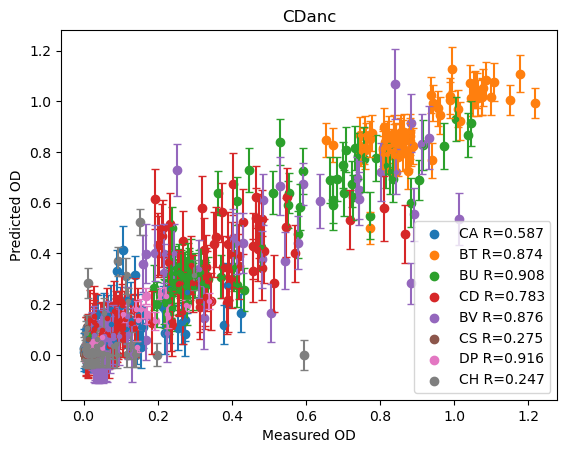

Total samples: 211, Initial regularization: 1.00e-03
Loss: 27.534, Residuals: -0.274
Loss: 11.012, Residuals: 0.146
Loss: 8.766, Residuals: 0.063
Loss: 5.626, Residuals: 0.036
Loss: 3.929, Residuals: 0.039
Loss: 3.808, Residuals: 0.023
Loss: 3.584, Residuals: 0.021
Loss: 3.204, Residuals: 0.017
Loss: 2.685, Residuals: 0.015
Loss: 2.633, Residuals: 0.030
Loss: 2.624, Residuals: 0.034
Loss: 2.545, Residuals: 0.029
Loss: 2.411, Residuals: 0.021
Loss: 2.406, Residuals: 0.028
Loss: 2.359, Residuals: 0.026
Loss: 2.275, Residuals: 0.020
Loss: 2.257, Residuals: 0.028
Loss: 2.223, Residuals: 0.025
Loss: 2.162, Residuals: 0.020
Loss: 2.136, Residuals: 0.024
Loss: 2.131, Residuals: 0.024
Loss: 2.093, Residuals: 0.021
Loss: 2.031, Residuals: 0.014
Loss: 2.028, Residuals: 0.018
Loss: 2.024, Residuals: 0.017
Loss: 1.988, Residuals: 0.013
Loss: 1.981, Residuals: 0.013
Loss: 1.968, Residuals: 0.012
Loss: 1.945, Residuals: 0.009
Loss: 1.931, Residuals: 0.008
Loss: 1.908, Residuals: 0.004
Loss: 1.907, R

Evidence 4494.355
Pass count  1
Total samples: 215, Initial regularization: 1.00e-03
Loss: 28.587, Residuals: -0.277
Loss: 10.832, Residuals: 0.153
Loss: 8.538, Residuals: 0.060
Loss: 5.482, Residuals: 0.037
Loss: 3.536, Residuals: 0.031
Loss: 3.449, Residuals: 0.033
Loss: 3.354, Residuals: 0.035
Loss: 3.181, Residuals: 0.031
Loss: 2.887, Residuals: 0.023
Loss: 2.571, Residuals: 0.010
Loss: 2.519, Residuals: 0.015
Loss: 2.430, Residuals: 0.011
Loss: 2.298, Residuals: 0.003
Loss: 2.294, Residuals: 0.005
Loss: 2.286, Residuals: 0.007
Loss: 2.222, Residuals: 0.004
Loss: 2.213, Residuals: 0.009
Loss: 2.140, Residuals: 0.003
Loss: 2.138, Residuals: 0.005
Loss: 2.136, Residuals: 0.006
Loss: 2.112, Residuals: 0.004
Loss: 2.103, Residuals: 0.012
Loss: 2.085, Residuals: 0.010
Loss: 2.054, Residuals: 0.007
Loss: 2.051, Residuals: 0.009
Loss: 2.031, Residuals: 0.007
Loss: 1.998, Residuals: 0.002
Loss: 1.995, Residuals: 0.003
Loss: 1.971, Residuals: 0.000
Loss: 1.968, Residuals: 0.001
Loss: 1.964,

Loss: 5.604, Residuals: 0.046
Loss: 3.832, Residuals: 0.031
Loss: 3.791, Residuals: 0.032
Loss: 3.431, Residuals: 0.028
Loss: 2.921, Residuals: 0.023
Loss: 2.440, Residuals: 0.007
Loss: 2.431, Residuals: 0.014
Loss: 2.416, Residuals: 0.012
Loss: 2.294, Residuals: 0.008
Loss: 2.279, Residuals: 0.013
Loss: 2.250, Residuals: 0.011
Loss: 2.198, Residuals: 0.008
Loss: 2.112, Residuals: 0.003
Loss: 2.110, Residuals: 0.007
Loss: 2.106, Residuals: 0.008
Loss: 2.066, Residuals: 0.005
Loss: 2.055, Residuals: 0.015
Loss: 2.039, Residuals: 0.016
Loss: 2.038, Residuals: 0.017
Loss: 2.011, Residuals: 0.014
Loss: 2.008, Residuals: 0.017
Loss: 1.979, Residuals: 0.013
Loss: 1.938, Residuals: 0.006
Loss: 1.933, Residuals: 0.008
Loss: 1.930, Residuals: 0.008
Loss: 1.906, Residuals: 0.006
Loss: 1.901, Residuals: 0.005
Loss: 1.898, Residuals: 0.005
Loss: 1.891, Residuals: 0.004
Loss: 1.880, Residuals: 0.003
Loss: 1.879, Residuals: 0.003
Loss: 1.866, Residuals: 0.001
Loss: 1.864, Residuals: -0.000
Loss: 1.8

Loss: 1.966, Residuals: 0.003
Loss: 1.962, Residuals: 0.002
Loss: 1.954, Residuals: 0.001
Loss: 1.953, Residuals: 0.000
Loss: 1.944, Residuals: -0.002
Loss: 1.943, Residuals: -0.002
Loss: 1.938, Residuals: -0.003
Loss: 1.933, Residuals: -0.004
Loss: 1.932, Residuals: -0.005
Loss: 1.932, Residuals: -0.004
Loss: 1.928, Residuals: -0.005
Loss: 1.928, Residuals: -0.005
Loss: 1.926, Residuals: -0.006
Loss: 1.926, Residuals: -0.006
Loss: 1.925, Residuals: -0.007
Loss: 1.923, Residuals: -0.007
Loss: 1.922, Residuals: -0.007
Loss: 1.922, Residuals: -0.008
Loss: 1.922, Residuals: -0.008
Loss: 1.921, Residuals: -0.008
Loss: 1.920, Residuals: -0.008
Loss: 1.920, Residuals: -0.008
Loss: 1.919, Residuals: -0.009
Loss: 1.919, Residuals: -0.009
Loss: 1.919, Residuals: -0.009
Loss: 1.918, Residuals: -0.009
Loss: 1.918, Residuals: -0.009
Loss: 1.918, Residuals: -0.010
Loss: 1.918, Residuals: -0.010
Loss: 1.917, Residuals: -0.010
Loss: 1.917, Residuals: -0.010
Loss: 1.917, Residuals: -0.010
Loss: 1.917,

Loss: 1.895, Residuals: -0.004
Loss: 1.893, Residuals: -0.004
Loss: 1.893, Residuals: -0.004
Loss: 1.892, Residuals: -0.004
Loss: 1.892, Residuals: -0.004
Loss: 1.890, Residuals: -0.004
Loss: 1.890, Residuals: -0.004
Loss: 1.889, Residuals: -0.005
Loss: 1.888, Residuals: -0.005
Loss: 1.888, Residuals: -0.005
Loss: 1.888, Residuals: -0.005
Loss: 1.888, Residuals: -0.005
Loss: 1.888, Residuals: -0.005
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Loss: 1.887, Residuals: -0.006
Evidence -54.385
Updating hyper-parameters...
Total samples: 215, Updated regularization: 3.48e-01
Loss: 110.708, Residuals: -0.011
Loss: 101.265, Residuals: -0.003
Loss: 101.150, Residuals: -0.

Total samples: 215, Updated regularization: 6.35e-01
Loss: 840.095, Residuals: -0.007
Optimization terminated successfully.
Evidence 4467.120
Updating hyper-parameters...
Total samples: 215, Updated regularization: 6.42e-01
Loss: 857.588, Residuals: -0.007
Loss: 856.989, Residuals: -0.008
Loss: 855.901, Residuals: -0.008
Loss: 854.198, Residuals: -0.007
Loss: 854.151, Residuals: -0.007
Optimization terminated successfully.
Evidence 4472.570
Updating hyper-parameters...
Total samples: 215, Updated regularization: 6.44e-01
Loss: 859.247, Residuals: -0.007
Optimization terminated successfully.
Evidence 4473.371
Pass count  1
Total samples: 213, Initial regularization: 1.00e-03
Loss: 27.573, Residuals: -0.288
Loss: 11.710, Residuals: 0.184
Loss: 9.019, Residuals: 0.072
Loss: 5.536, Residuals: 0.049
Loss: 3.860, Residuals: 0.041
Loss: 3.107, Residuals: 0.047
Loss: 3.048, Residuals: 0.021
Loss: 2.938, Residuals: 0.020
Loss: 2.746, Residuals: 0.018
Loss: 2.488, Residuals: 0.012
Loss: 2.468, R

Loss: 28.827, Residuals: -0.295
Loss: 10.447, Residuals: 0.139
Loss: 8.325, Residuals: 0.060
Loss: 5.197, Residuals: 0.076
Loss: 3.314, Residuals: 0.043
Loss: 3.253, Residuals: 0.041
Loss: 3.143, Residuals: 0.038
Loss: 2.953, Residuals: 0.033
Loss: 2.679, Residuals: 0.020
Loss: 2.465, Residuals: 0.015
Loss: 2.431, Residuals: 0.020
Loss: 2.369, Residuals: 0.018
Loss: 2.263, Residuals: 0.012
Loss: 2.249, Residuals: 0.016
Loss: 2.135, Residuals: 0.009
Loss: 2.124, Residuals: 0.015
Loss: 2.035, Residuals: 0.009
Loss: 2.019, Residuals: 0.012
Loss: 1.996, Residuals: 0.011
Loss: 1.957, Residuals: 0.007
Loss: 1.953, Residuals: 0.011
Loss: 1.921, Residuals: 0.004
Loss: 1.920, Residuals: 0.005
Loss: 1.916, Residuals: 0.004
Loss: 1.908, Residuals: 0.003
Loss: 1.895, Residuals: -0.001
Loss: 1.895, Residuals: -0.000
Loss: 1.894, Residuals: -0.000
Loss: 1.893, Residuals: -0.000
Loss: 1.891, Residuals: -0.001
Loss: 1.888, Residuals: -0.001
Loss: 1.885, Residuals: -0.002
Loss: 1.885, Residuals: -0.002

Loss: 2.016, Residuals: 0.011
Loss: 2.015, Residuals: 0.015
Loss: 2.001, Residuals: 0.013
Loss: 1.982, Residuals: 0.011
Loss: 1.951, Residuals: 0.007
Loss: 1.951, Residuals: 0.009
Loss: 1.949, Residuals: 0.009
Loss: 1.937, Residuals: 0.006
Loss: 1.936, Residuals: 0.007
Loss: 1.923, Residuals: 0.003
Loss: 1.923, Residuals: 0.004
Loss: 1.918, Residuals: 0.002
Loss: 1.911, Residuals: 0.000
Loss: 1.911, Residuals: 0.001
Loss: 1.910, Residuals: 0.001
Loss: 1.910, Residuals: 0.001
Loss: 1.907, Residuals: -0.000
Loss: 1.906, Residuals: -0.000
Loss: 1.905, Residuals: -0.001
Loss: 1.905, Residuals: -0.001
Loss: 1.904, Residuals: -0.001
Loss: 1.903, Residuals: -0.001
Loss: 1.903, Residuals: -0.001
Loss: 1.902, Residuals: -0.002
Loss: 1.902, Residuals: -0.002
Loss: 1.901, Residuals: -0.002
Loss: 1.901, Residuals: -0.002
Loss: 1.900, Residuals: -0.002
Loss: 1.900, Residuals: -0.003
Loss: 1.900, Residuals: -0.002
Loss: 1.900, Residuals: -0.003
Loss: 1.900, Residuals: -0.003
Loss: 1.900, Residuals: 

Loss: 1.999, Residuals: 0.001
Loss: 1.996, Residuals: 0.000
Loss: 1.996, Residuals: 0.001
Loss: 1.995, Residuals: 0.000
Loss: 1.994, Residuals: -0.000
Loss: 1.994, Residuals: -0.000
Loss: 1.993, Residuals: -0.001
Loss: 1.993, Residuals: -0.001
Loss: 1.993, Residuals: -0.001
Loss: 1.992, Residuals: -0.001
Loss: 1.992, Residuals: -0.001
Loss: 1.992, Residuals: -0.001
Loss: 1.992, Residuals: -0.001
Loss: 1.992, Residuals: -0.001
Loss: 1.992, Residuals: -0.001
Loss: 1.991, Residuals: -0.001
Loss: 1.991, Residuals: -0.001
Loss: 1.990, Residuals: -0.001
Loss: 1.990, Residuals: -0.001
Loss: 1.989, Residuals: -0.001
Loss: 1.988, Residuals: -0.001
Loss: 1.988, Residuals: -0.001
Loss: 1.984, Residuals: -0.001
Loss: 1.982, Residuals: -0.002
Loss: 1.980, Residuals: -0.002
Loss: 1.968, Residuals: -0.002
Loss: 1.962, Residuals: -0.003
Loss: 1.959, Residuals: -0.003
Loss: 1.953, Residuals: -0.003
Loss: 1.942, Residuals: -0.004
Loss: 1.940, Residuals: -0.005
Loss: 1.936, Residuals: -0.006
Loss: 1.933,

Evidence 3173.297
Updating hyper-parameters...
Total samples: 216, Updated regularization: 5.71e-01
Loss: 601.033, Residuals: -0.009
Loss: 596.901, Residuals: -0.009
Loss: 595.370, Residuals: -0.009
Loss: 593.230, Residuals: -0.010
Loss: 589.891, Residuals: -0.010
Loss: 589.815, Residuals: -0.010
Optimization terminated successfully.
Evidence 4476.938
Updating hyper-parameters...
Total samples: 216, Updated regularization: 6.51e-01
Loss: 840.671, Residuals: -0.009
Optimization terminated successfully.
Evidence 4562.169
Updating hyper-parameters...
Total samples: 216, Updated regularization: 6.59e-01
Loss: 859.167, Residuals: -0.010
Loss: 856.508, Residuals: -0.010
Loss: 852.203, Residuals: -0.010
Loss: 851.908, Residuals: -0.010
Loss: 849.583, Residuals: -0.010
Loss: 848.146, Residuals: -0.010
Loss: 848.079, Residuals: -0.010
Optimization terminated successfully.
Evidence 4575.728
Updating hyper-parameters...
Total samples: 216, Updated regularization: 6.28e-01
Loss: 860.755, Residuals

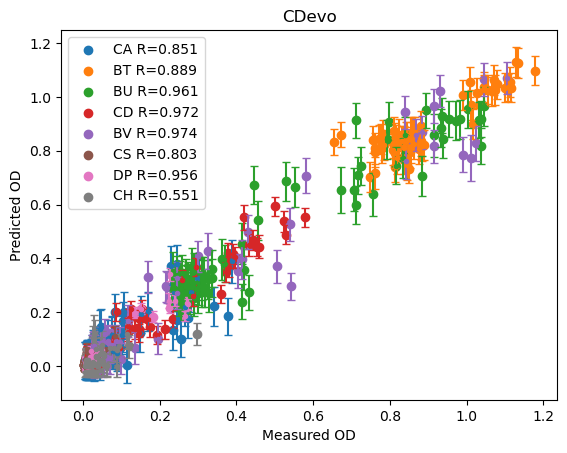

In [4]:
# run kfold for each file 
for file in files:
    strain = file.split("_")[0]
    
    # import data
    df = pd.read_csv(f"data/SET3_Thirdtrial/{file}")
    df.sort_values(by=["Treatments", "Time"], inplace=True)
    
    # make sure that conditions have at least one measurement
    dfs = []
    for treatment, df_t in df.groupby("Treatments"):
        if df_t.shape[0] > 1:
            dfs.append(df_t)
    df = pd.concat(dfs)

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    mono_dfs = []
    dfs = []
    treatments = []
    for treatment, df_i in df.groupby("Treatments"):
        # hyphen is only in community conditions
        if "-" in treatment:
            dfs.append(df_i)
            # save treatment name without the replicate identifier 
            treatments.append([treatment.split("_")[0]]*df_i.shape[0])
        else:
            mono_dfs.append(df_i)
    treatments = np.concatenate(treatments)
    unique_treatments = np.unique(treatments)
    mono_df = pd.concat(mono_dfs)
    df = pd.concat(dfs)

    # init kfold object
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)

    # keep track of all predictions
    all_exp_names = []
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    for train_index, test_index in kf.split(unique_treatments):
        
        # get train df
        train_inds = np.in1d(treatments, unique_treatments[train_index])
        train_df = df.iloc[train_inds].copy()
        train_df = pd.concat((mono_df, train_df))
        
        # average replicates in the test_df
        test_df = []
        for test_treatment in unique_treatments[test_index]:
            # pull dataframe with all replicates of same test treatment 
            treatment_inds = np.in1d(treatments, test_treatment)
            df_treatment = df.iloc[treatment_inds].copy()
            
            # get set of unique measurement times
            treatment_times = np.unique(df_treatment.Time.values)
            
            # init dataframe to store averaged values
            avg_df = pd.DataFrame()
            avg_df['Treatments'] = [test_treatment]*len(treatment_times)
            avg_df['Time'] = treatment_times

            avg_data = np.zeros([len(treatment_times), len(species)])
            for i, time in enumerate(treatment_times):
                avg_data[i] = df_treatment.iloc[df_treatment.Time.values==time][species].mean()
            avg_df[species] = avg_data
            test_df.append(avg_df)
        
        # combine averaged dataframes for test dataframe
        test_df = pd.concat(test_df)
        
        # instantiate gLV fit 
        model = gLV(species, train_df)

        # fit to data 
        model.fit()

        # plot fitness to data
        exp_names, pred_species, true, pred, stdv = predict_df(test_df, species)

        # append predictions 
        all_exp_names = np.append(all_exp_names, exp_names)
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        kfold_df = pd.DataFrame()
        kfold_df['Treatments'] = all_exp_names
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_{n_splits}_fold.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"figures/{strain}_{n_splits}_fold.pdf", dpi=300)
    plt.show()